In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load data
df = pd.read_csv("C:/Users/Chandana D/Downloads/Titanic-Dataset.csv")   # change the filename if different
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Columns:", df.columns.tolist())
print("\n🔹 First 5 rows:\n", df.head())

🔹 Dataset Shape: (891, 12)

🔹 Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

🔹 First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C8

In [4]:
# Summary statistics & missing values
print("\n📊 Summary Statistics:\n", df.describe(include='all'))
print("\n❌ Missing Values:\n", df.isnull().sum())


📊 Summary Statistics:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Pa

In [5]:
# Numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\n🔢 Numeric columns:", numeric_cols)


🔢 Numeric columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


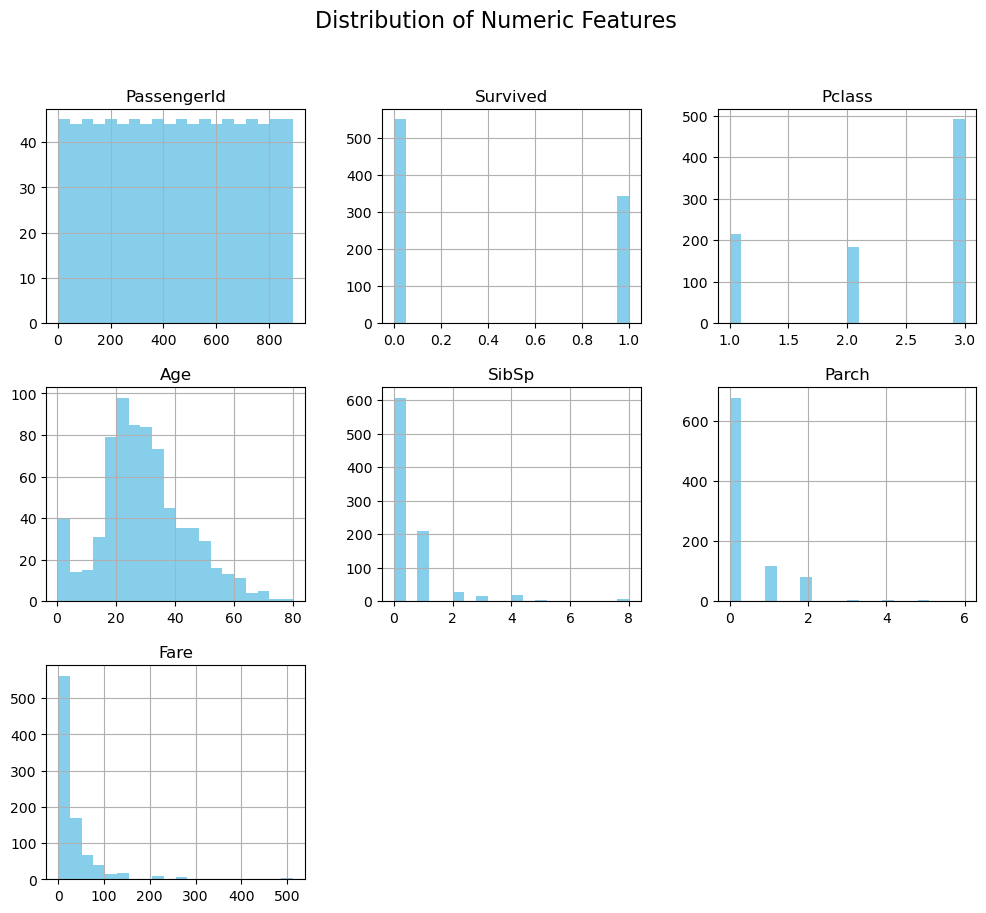

In [6]:
# Histograms for numeric features
df[numeric_cols].hist(figsize=(12, 10), bins=20, color='skyblue')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

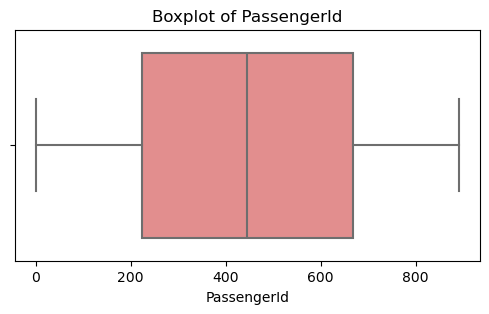

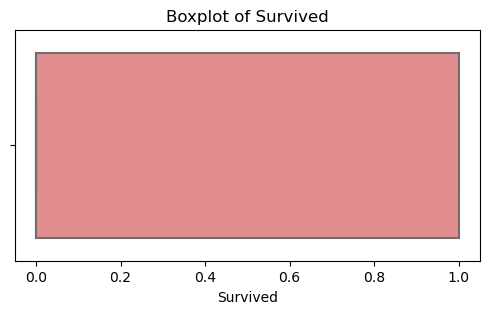

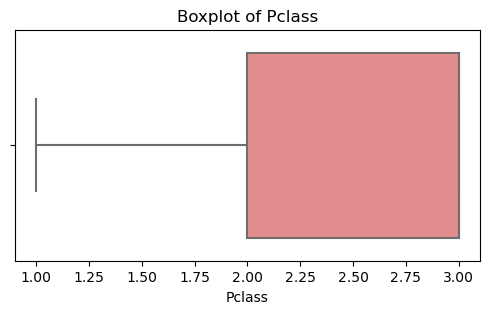

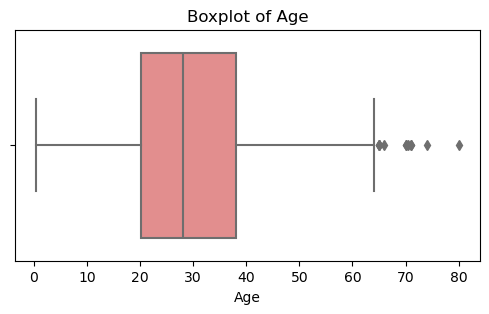

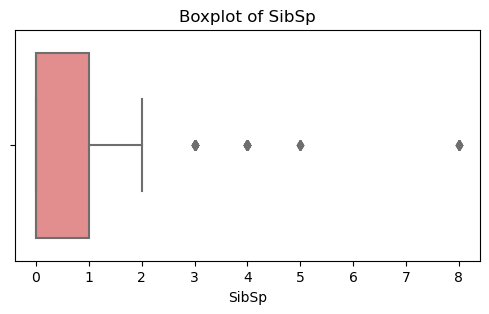

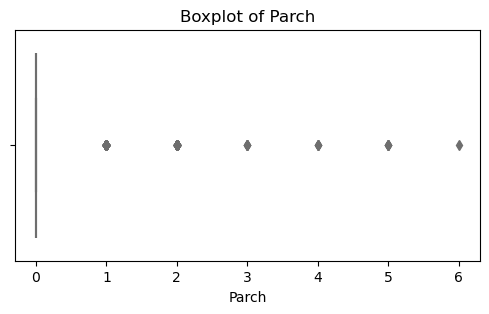

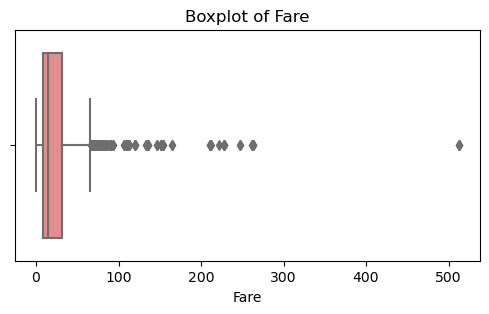

In [7]:
# Boxplots to detect outliers for numeric features
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.show()

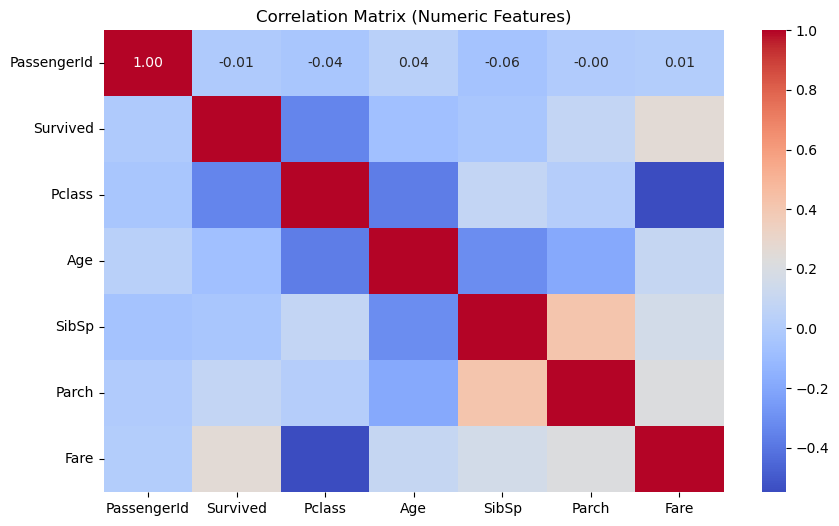

In [8]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

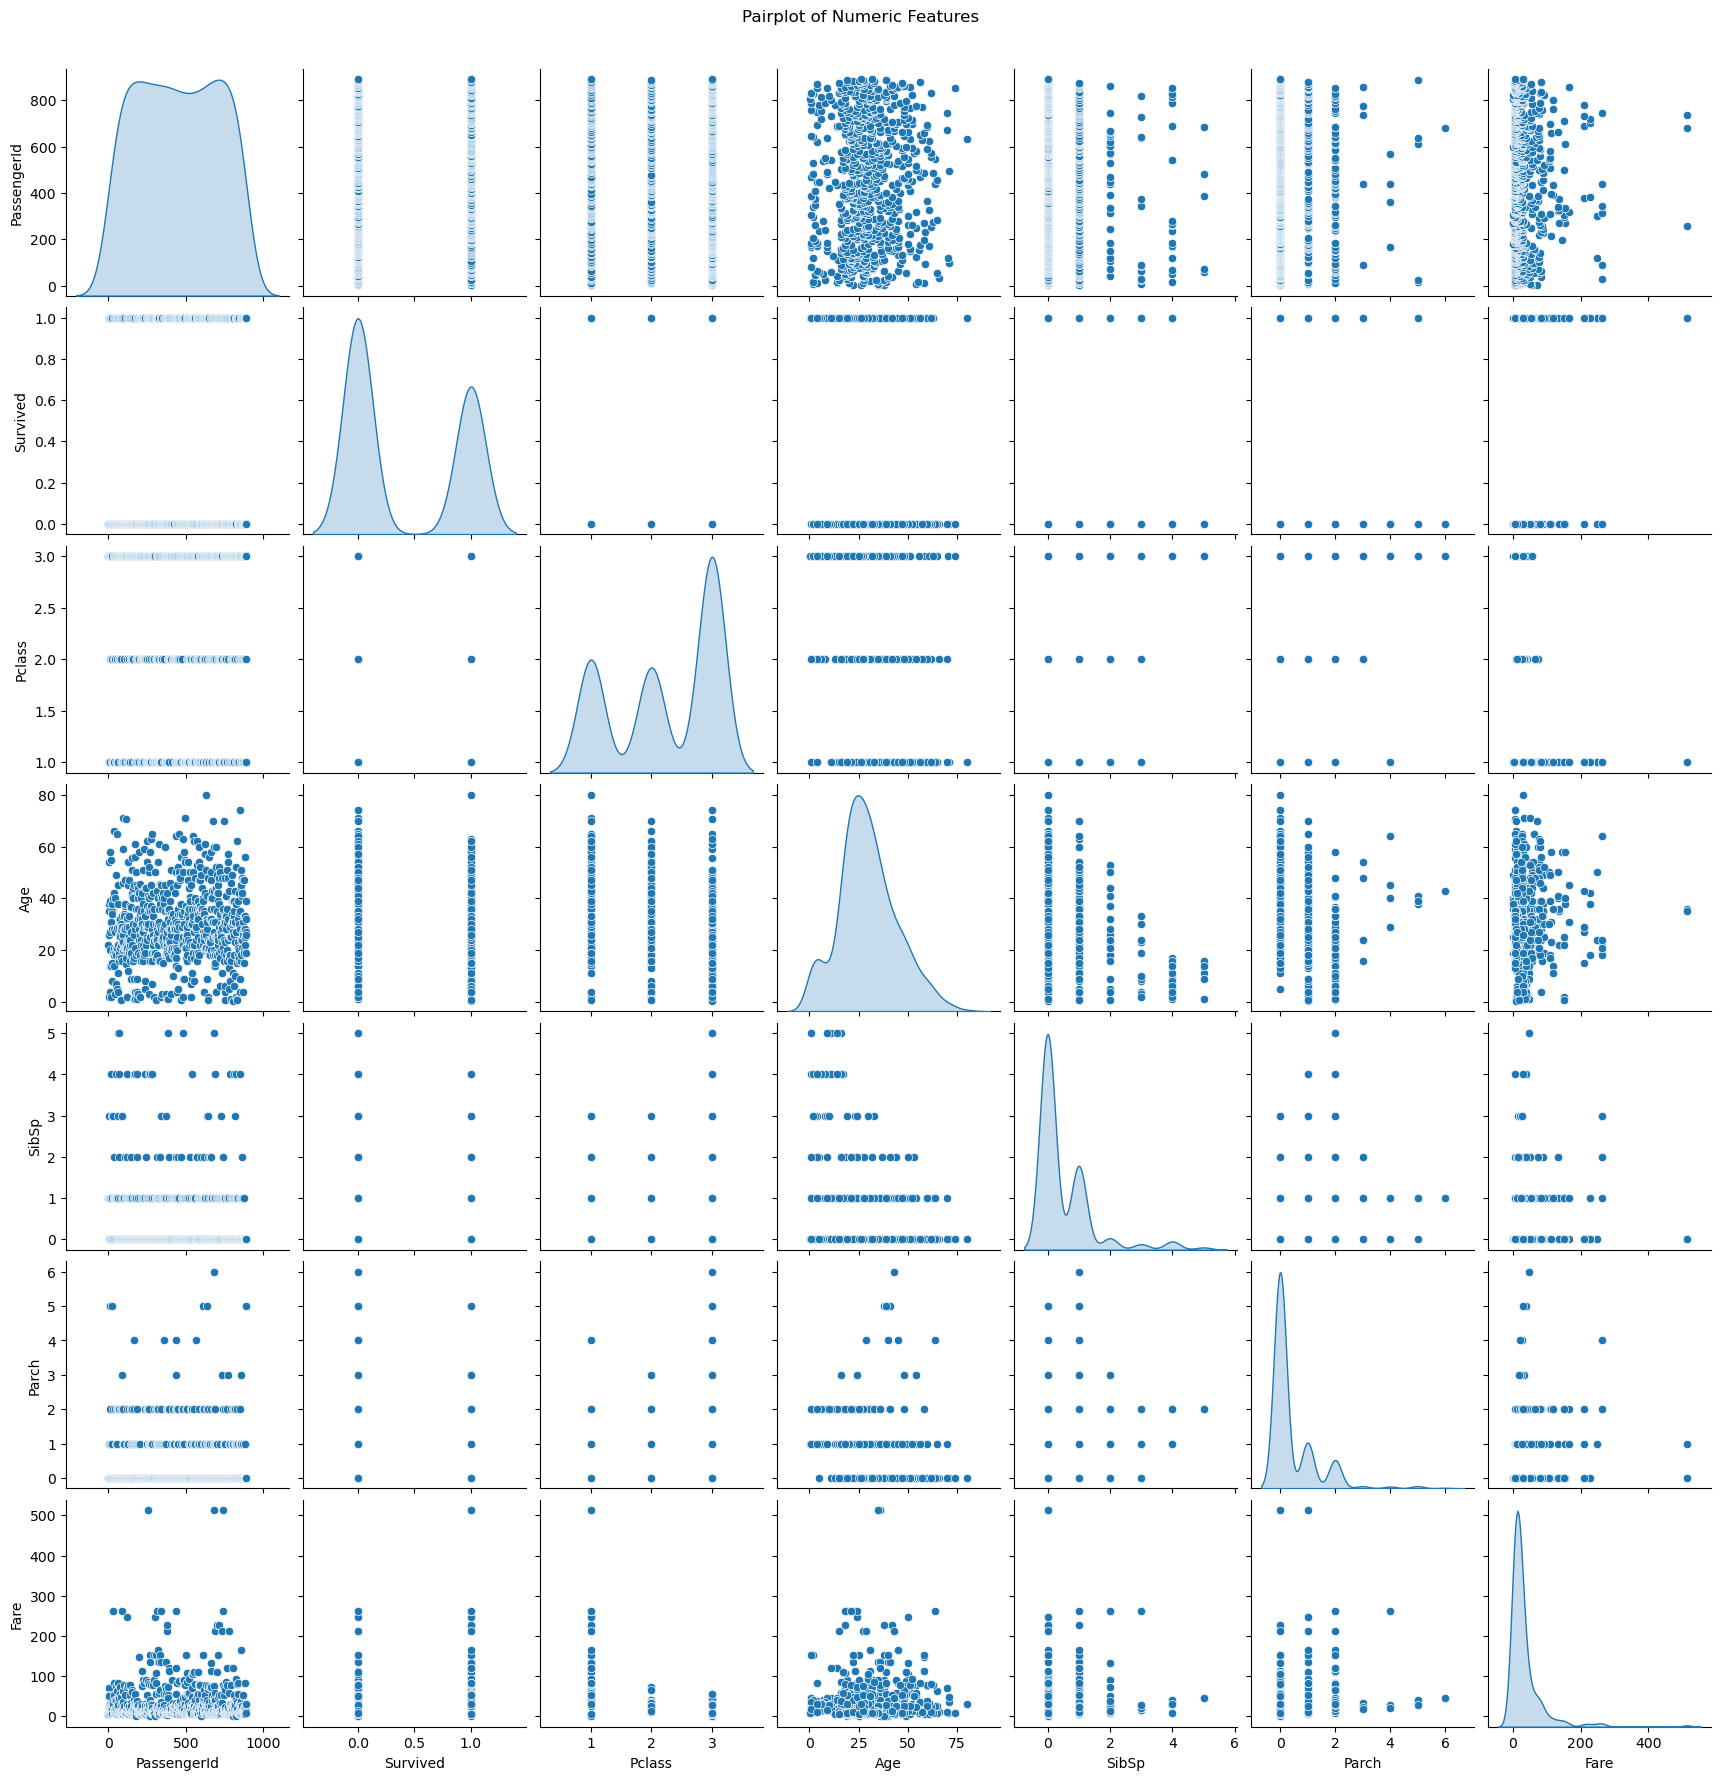

In [9]:
# Pairplot (only if dataset size allows)
sns.pairplot(df[numeric_cols].dropna(), diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


🗂 Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


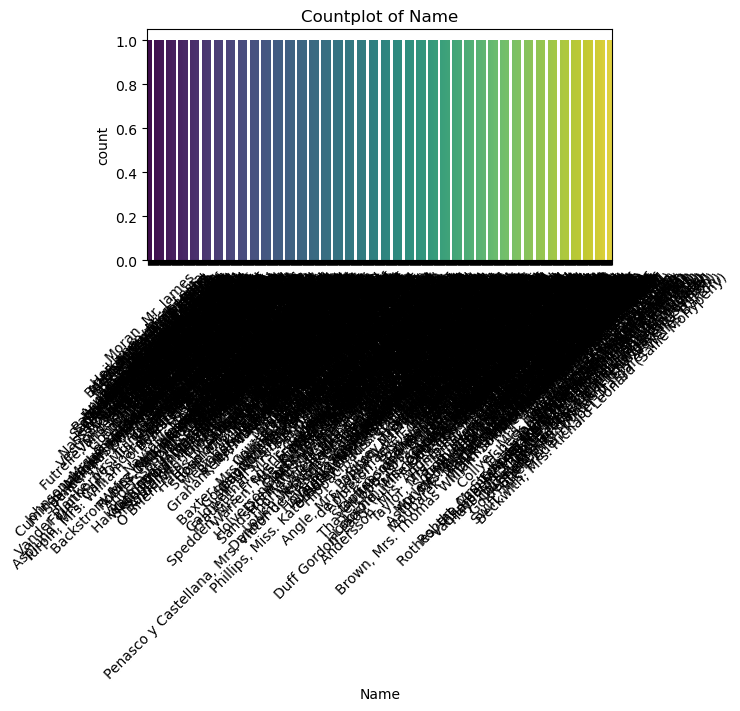

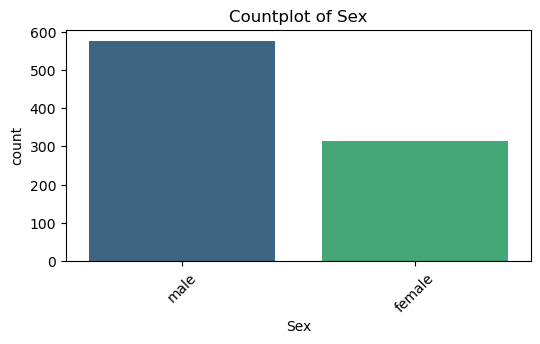

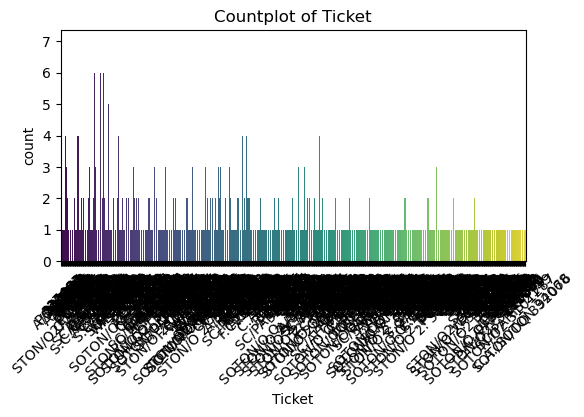

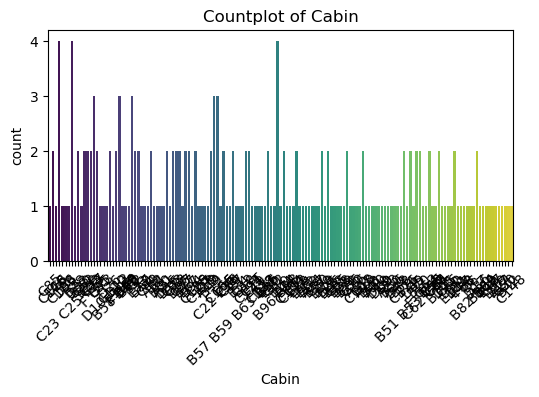

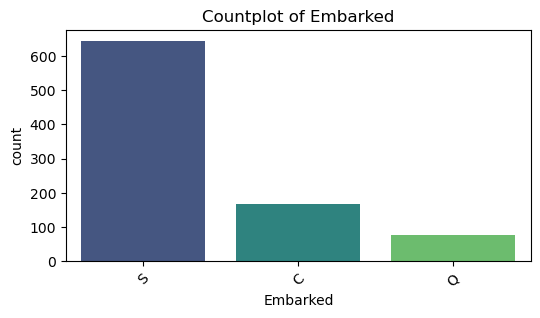

In [10]:
# Categorical features — quick frequency plots
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("\n🗂 Categorical columns:", cat_cols)
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

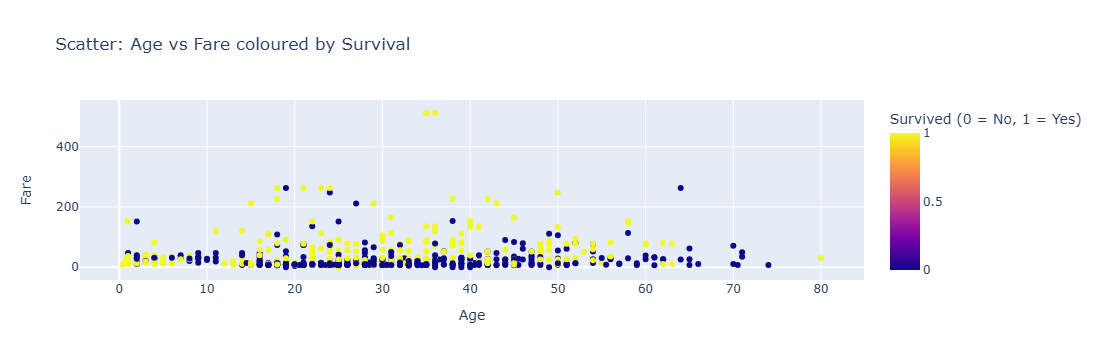

In [11]:
# Interactive visualization example (Plotly)
# Example: Survival vs Age and Fare
fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                 title="Scatter: Age vs Fare coloured by Survival",
                 labels={'Survived': 'Survived (0 = No, 1 = Yes)'})
fig.show()